In [1]:
import os 
os.chdir('..')

/tmp/ipykernel_3380186/193622411.py:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='Phases')


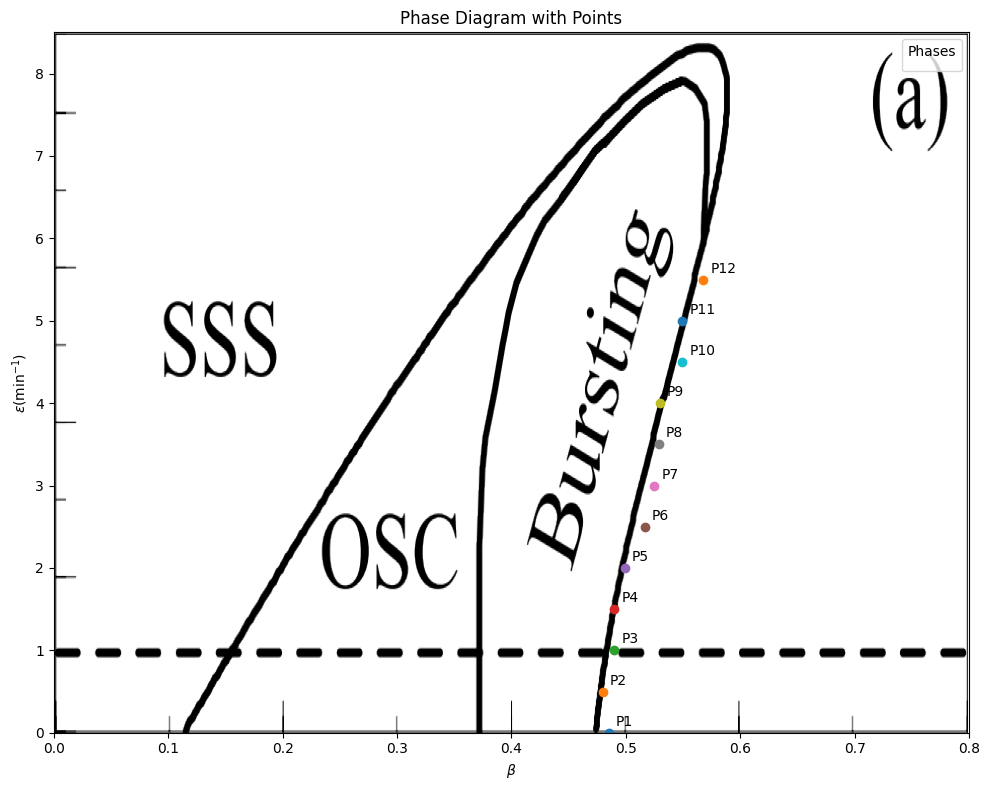

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from functions.module_gen import load_beta_epsilon

def preprocess_image(image_path):
    img = Image.open(image_path)
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Assume the background is white, set all white (and near-white) pixels to full transparency
    white_threshold = 250
    alpha = np.where(np.all(img_array[:,:,:3] > white_threshold, axis=2), 0, 255).astype(np.uint8)
    
    # Add alpha channel to the image
    img_array = np.dstack((img_array[:,:,:3], alpha))
    
    # Crop the image to remove axes and labels
    crop_top = 33
    crop_bottom = 195
    crop_left = 253
    crop_right = 50
    
    img_cropped = img_array[crop_top:-crop_bottom, crop_left:-crop_right]
    
    # Ensure the array is in uint8 format
    img_cropped = img_cropped.astype(np.uint8)
    
    return Image.fromarray(img_cropped)

# Function to check which phase a point is in
def check_phase(beta, epsilon):
    if beta < 0.2:
        return "SSS"
    elif 0.2 <= beta < 0.4:
        if epsilon > 1:
            return "OSC"
        else:
            return "SSS"
    else:
        if epsilon > 6 - 10 * (beta - 0.4):  # Approximate upper boundary of Bursting
            return "Bursting"
        elif epsilon < 1:  # Approximate lower boundary
            return "SSS"
        else:
            return "OSC"

# Load the image
image_path = "./image.png"
img = preprocess_image(image_path)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Display the preprocessed image
ax.imshow(img, extent=[0, 0.8, 0, 8.5], aspect='auto')

# Set the axis labels and title
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\epsilon (\text{min}^{-1})$')
ax.set_title('Phase Diagram with Points')

# Set the correct axis limits
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 8.5)

# Load Points data
system_type = 'Bosc'
Points = load_beta_epsilon(system_type)

# Plot the points and determine their phases
for i, (beta, epsilon) in enumerate(Points):
    phase = check_phase(beta, epsilon)
    ax.plot(beta, epsilon, marker='o', markersize=6)
    ax.annotate(f'P{i+1}', (beta, epsilon), xytext=(5, 5), textcoords='offset points')

ax.legend(title='Phases')

# Adjust the layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

# Print the phase for each point
for i, (beta, epsilon) in enumerate(Points):
    phase = check_phase(beta, epsilon)